<a href="https://colab.research.google.com/github/mgkim-developer/INU-Lab/blob/master/my_first_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from keras.callbacks import EarlyStopping  

np.random.seed(3)

# # 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X, Y), (X_test, Y_test) = mnist.load_data()
# print('shape of X_train', X_train.shape)
# print('shape of Y_train', Y_train.shape)
# print('shape of X_test', X_test.shape)
# print('shape of Y_test', Y_test.shape)

# import matplotlib.pyplot as plt
# plt.imshow(X_train[99])
# print(Y_train[99])

# 훈련셋과 검증셋 분리
X_train = X[:50000]
Y_train = Y[:50000]
X_val = X[50000:]
Y_val = Y[50000:]



X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0



# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)


X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]


# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, mode='min')
hist = model.fit(X_train, Y_train, epochs=2000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])
# print(hist.history['loss'])
# print(hist.history['accuracy'])
# print(hist.history['val_loss'])
# print(hist.history['val_accuracy'])

Train on 700 samples, validate on 300 samples
Epoch 1/2000
700/700 [==============================] - 0s 218us/step - loss: 2.2820 - accuracy: 0.1429 - val_loss: 2.2225 - val_accuracy: 0.2633
Epoch 2/2000
700/700 [==============================] - 0s 152us/step - loss: 2.1781 - accuracy: 0.2043 - val_loss: 2.1325 - val_accuracy: 0.3233
Epoch 3/2000
700/700 [==============================] - 0s 145us/step - loss: 2.1032 - accuracy: 0.3014 - val_loss: 2.0701 - val_accuracy: 0.3400
Epoch 4/2000
700/700 [==============================] - 0s 149us/step - loss: 2.0444 - accuracy: 0.3257 - val_loss: 2.0204 - val_accuracy: 0.3200
Epoch 5/2000
700/700 [==============================] - 0s 146us/step - loss: 1.9932 - accuracy: 0.3357 - val_loss: 1.9762 - val_accuracy: 0.3133
Epoch 6/2000
700/700 [==============================] - 0s 144us/step - loss: 1.9452 - accuracy: 0.3557 - val_loss: 1.9347 - val_accuracy: 0.3133
Epoch 7/2000
700/700 [==============================] - 0s 145us/step - loss: 

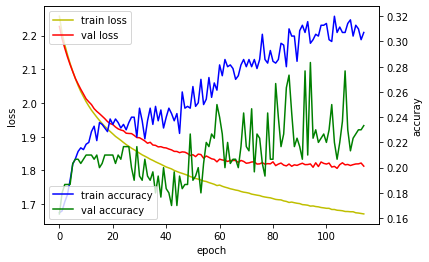

In [2]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()